In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import pandas as pd
import glob
from IPython.display import display
import numpy as np

In [2]:
def data_view(df):
    display(df.head())
    display(df.info())
    df.describe()

    # Selecciona solo las columnas con valores numericos
    columnas_numericas = df.select_dtypes(include=[np.number])
    if len(columnas_numericas.columns) > 0:
        num_columnas = len(columnas_numericas.columns)

        # Calcular la mediana de cada columna numérica y la imprime
        print(columnas_numericas.median())

        # Muestra los gráficos de caja de cada columna numérica
        plt.figure(figsize=(20, 0.6*num_columnas))
        sns.boxplot(data=columnas_numericas, orient="h")
        plt.title('Boxplots de todas las columnas numéricas')
        plt.xlabel('Valores')
        plt.ylabel('Columnas')
        plt.show()

        # Grafica un histograma de cada columna numérica
        num_filas = (num_columnas + 2) // 3
        num_columnas_figura = 3

        fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas_figura, figsize=(20, 5*num_filas))

        # Convertir 'axes' de 2D a 1D
        axes = axes.ravel()

        for i, columna in enumerate(columnas_numericas):
            sns.histplot(df[columna], bins=20, kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma de {columna}')
            axes[i].set_xlabel('Valor')
            axes[i].set_ylabel('Frecuencia')

        plt.tight_layout()
        plt.show()

    return df

In [3]:
df = pd.read_pickle(f'./Internet_datasets/Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.pickle')

,Año,Trimestre,Provincia,hasta 512kb,512Kb a 1Mb,1Mb a 6Mb,6Mb a 10Mb,10Mb a 20Mb,20Mb a 30Mb,mas de 30Mb,Otros,Total
0,2022,1,Buenos Aires,31591,30056,313382,321756,290127,161183,3381049,2628,4555424
1,2022,1,Capital Federal,5270,5575,39918,7739,61053,43289,1188072,1717,1417541
2,2022,1,Catamarca,710,4560,4386,7009,8773,3761,35715,2207,62378
3,2022,1,Chaco,4610,1099,16888,21235,20898,13012,62946,758,144119
4,2022,1,Chubut,1130,1677,61369,31856,3308,13871,14055,15607,171628


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          792 non-null    int64 
 1   Trimestre    792 non-null    int64 
 2   Provincia    792 non-null    object
 3   hasta 512kb  792 non-null    int32 
 4   512Kb a 1Mb  792 non-null    int32 
 5   1Mb a 6Mb    792 non-null    int32 
 6   6Mb a 10Mb   792 non-null    int32 
 7   10Mb a 20Mb  792 non-null    int32 
 8   20Mb a 30Mb  792 non-null    int32 
 9   mas de 30Mb  792 non-null    int32 
 10  Otros        792 non-null    int32 
 11  Total        792 non-null    int32 
dtypes: int32(9), int64(2), object(1)
memory usage: 46.5+ KB


None

Año              2018.0
Trimestre           2.0
hasta 512kb      1050.0
512Kb a 1Mb      3752.5
1Mb a 6Mb       51598.0
6Mb a 10Mb       7744.5
10Mb a 20Mb      7124.0
20Mb a 30Mb      1958.0
mas de 30Mb       618.5
Otros               0.0
Total          100876.5
dtype: float64


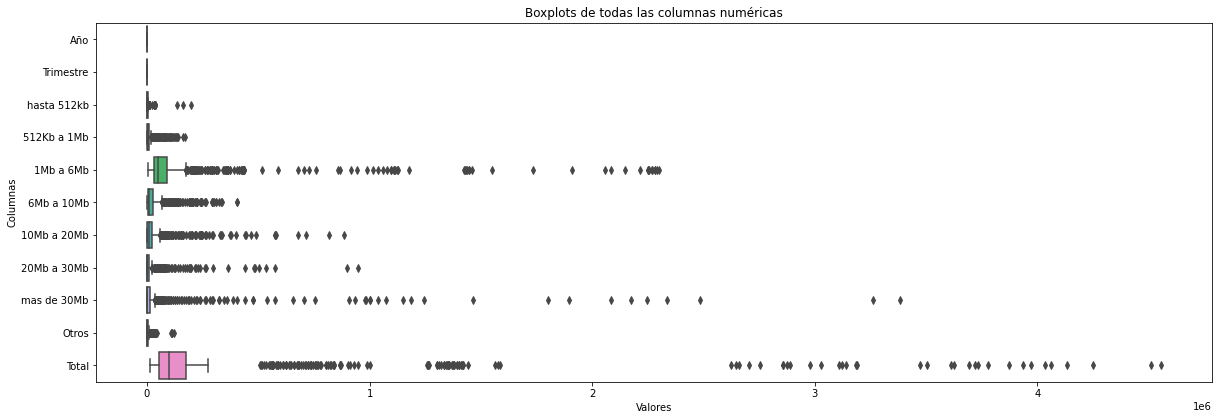

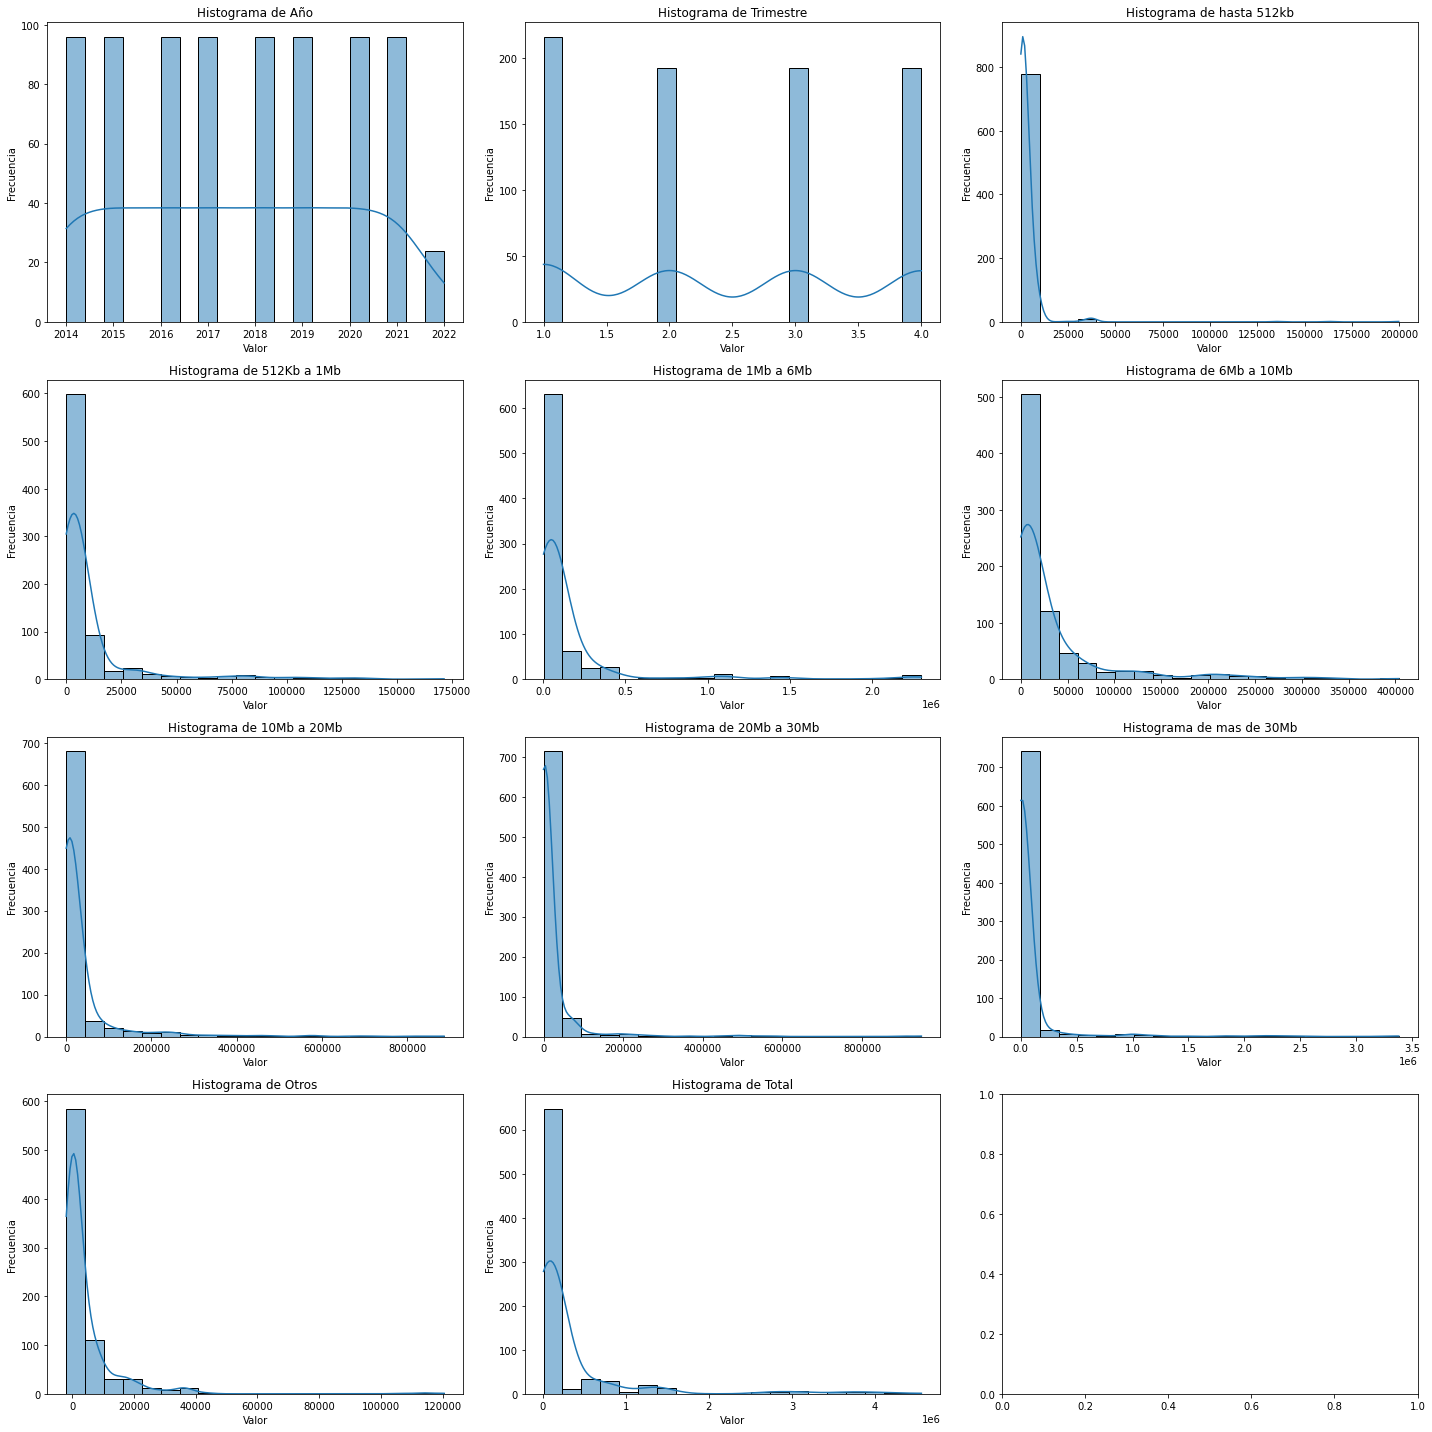

,Año,Trimestre,Provincia,hasta 512kb,512Kb a 1Mb,1Mb a 6Mb,6Mb a 10Mb,10Mb a 20Mb,20Mb a 30Mb,mas de 30Mb,Otros,Total
0,2022,1,Buenos Aires,31591,30056,313382,321756,290127,161183,3381049,2628,4555424
1,2022,1,Capital Federal,5270,5575,39918,7739,61053,43289,1188072,1717,1417541
2,2022,1,Catamarca,710,4560,4386,7009,8773,3761,35715,2207,62378
3,2022,1,Chaco,4610,1099,16888,21235,20898,13012,62946,758,144119
4,2022,1,Chubut,1130,1677,61369,31856,3308,13871,14055,15607,171628
...,...,...,...,...,...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,1610,1625,24972,10,10,0,0,0,26760
788,2014,1,Santa Fe,8456,124468,345225,20328,6845,230,668,0,506013
789,2014,1,Santiago Del Estero,1234,10531,22817,2422,1090,0,0,0,37113
790,2014,1,Tierra Del Fuego,120,6070,30902,60,0,0,0,0,31527


In [4]:
data_view(df)

In [5]:
df['Año y trimestre'] = df['Año'].astype(str)+'-'+df['Trimestre'].astype(str)
df.drop(['Año','Trimestre'],axis=1,inplace=True)
df.head()

,Provincia,hasta 512kb,512Kb a 1Mb,1Mb a 6Mb,6Mb a 10Mb,10Mb a 20Mb,20Mb a 30Mb,mas de 30Mb,Otros,Total,Año y trimestre
0,Buenos Aires,31591,30056,313382,321756,290127,161183,3381049,2628,4555424,2022-1
1,Capital Federal,5270,5575,39918,7739,61053,43289,1188072,1717,1417541,2022-1
2,Catamarca,710,4560,4386,7009,8773,3761,35715,2207,62378,2022-1
3,Chaco,4610,1099,16888,21235,20898,13012,62946,758,144119,2022-1
4,Chubut,1130,1677,61369,31856,3308,13871,14055,15607,171628,2022-1


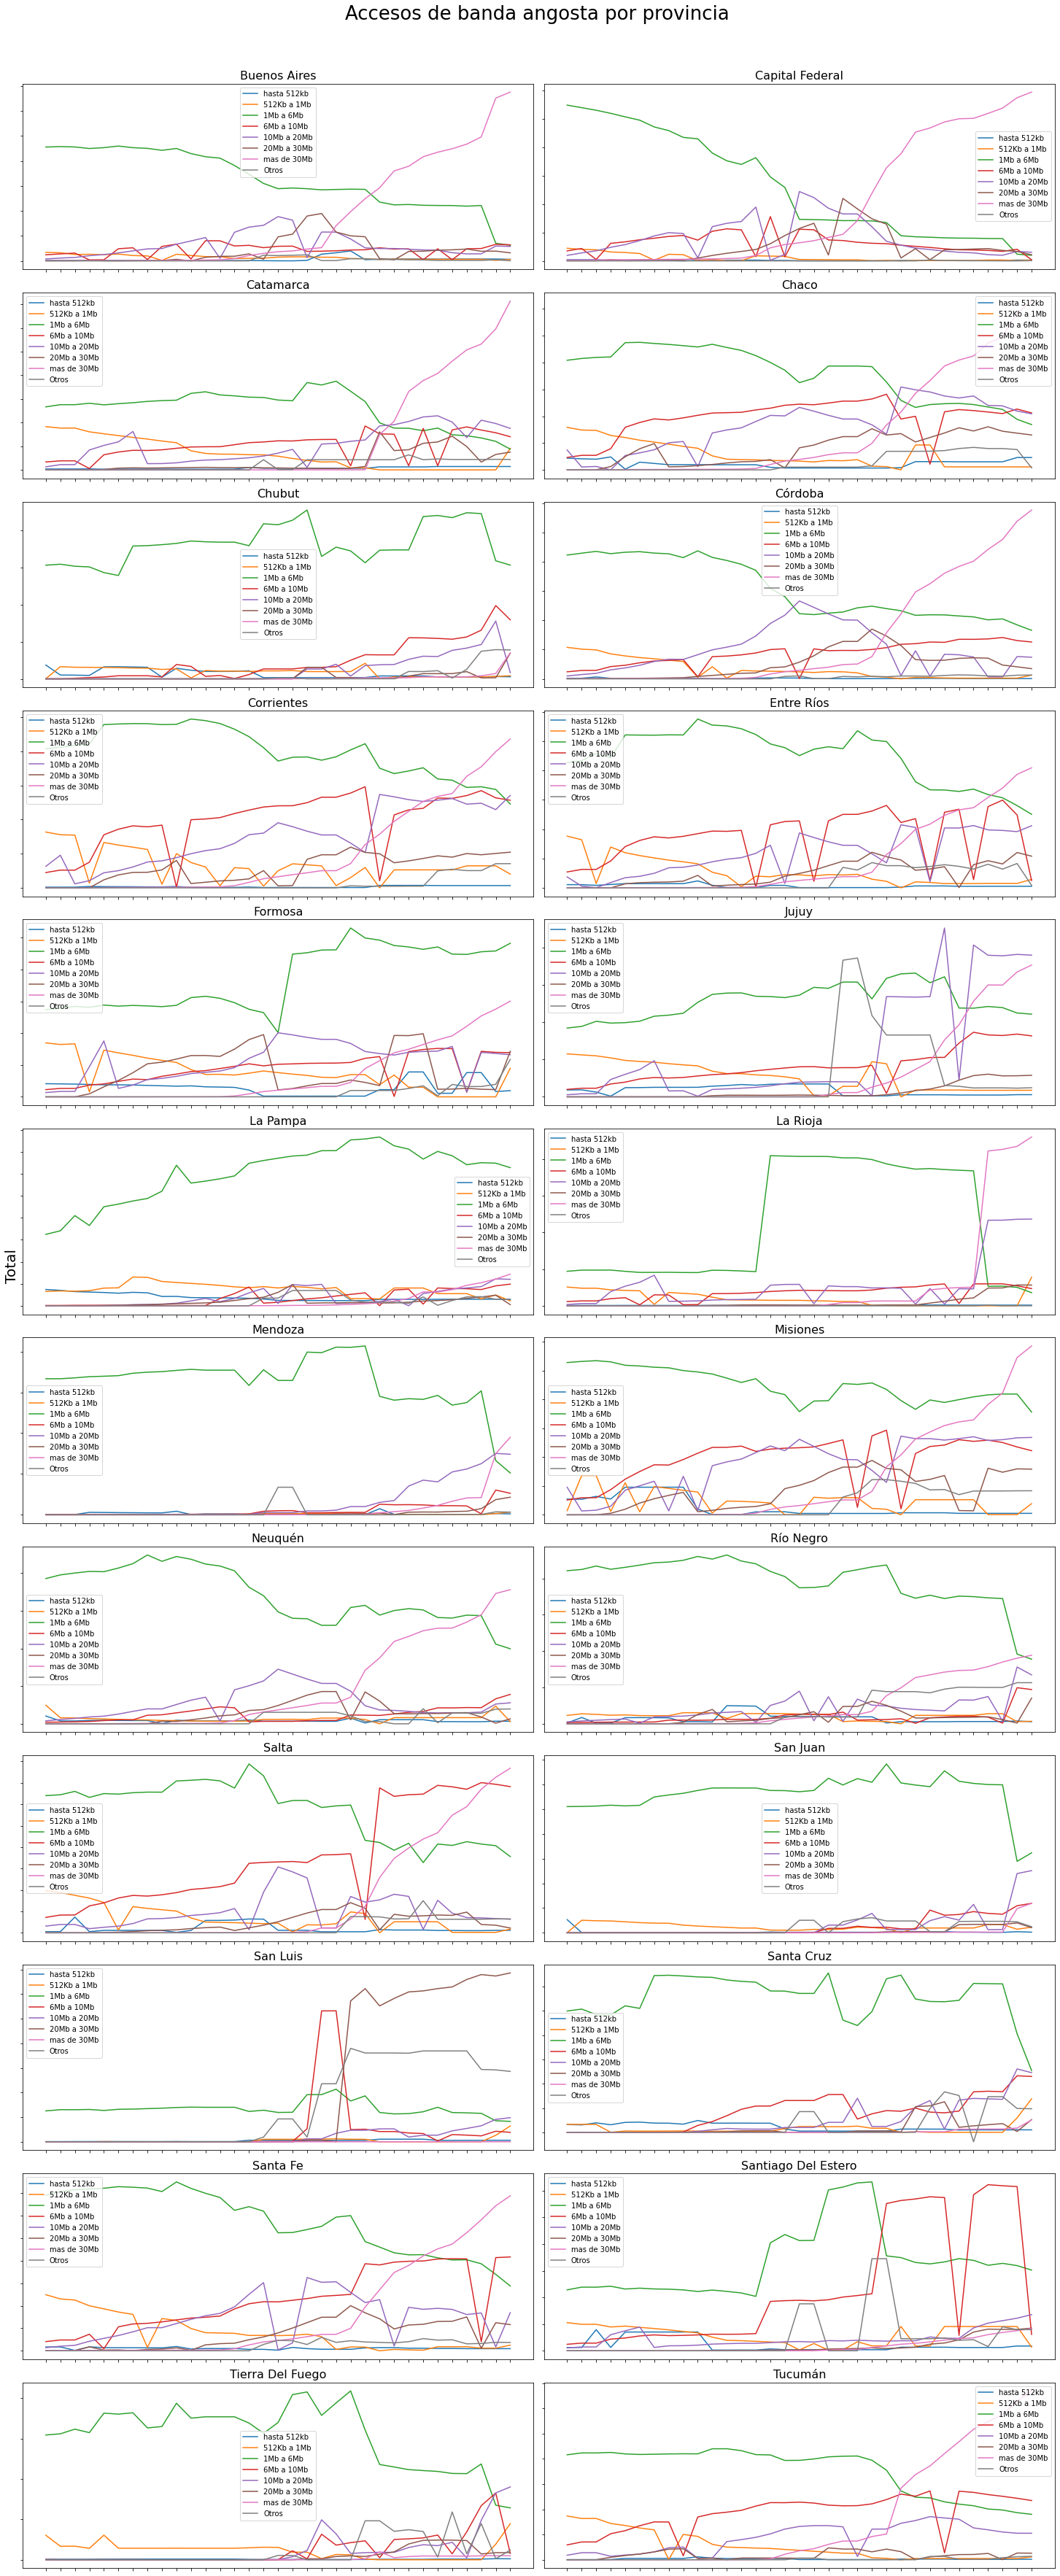

In [6]:
provincias = df['Provincia'].unique()
num_filas = (len(provincias) + 1) // 2
num_columnas = 2

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 50))

for i, provincia in enumerate(provincias):
    fila = i // num_columnas
    columna = i % num_columnas
    
    ax = axs[fila, columna] if num_filas > 1 else axs[columna]
    
    temp = df[df['Provincia'] == provincia].sort_values('Año y trimestre')
    
    # Agregar línea para 'banda angosta'
    ax.plot(temp['Año y trimestre'], temp['hasta 512kb'], label='hasta 512kb')
    ax.plot(temp['Año y trimestre'], temp['512Kb a 1Mb'], label='512Kb a 1Mb')
    ax.plot(temp['Año y trimestre'], temp['1Mb a 6Mb'], label='1Mb a 6Mb')
    ax.plot(temp['Año y trimestre'], temp['6Mb a 10Mb'], label='6Mb a 10Mb')
    ax.plot(temp['Año y trimestre'], temp['10Mb a 20Mb'], label='10Mb a 20Mb')
    ax.plot(temp['Año y trimestre'], temp['20Mb a 30Mb'], label='20Mb a 30Mb')
    ax.plot(temp['Año y trimestre'], temp['mas de 30Mb'], label='mas de 30Mb')
    ax.plot(temp['Año y trimestre'], temp['Otros'], label='Otros')
    ax.legend()
    
    # Eliminar etiquetas del eje y
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    # Agregar título de la provincia encima del gráfico
    ax.set_title(provincia, fontsize=16)
    
# Ajustar los espacios entre los subplots
plt.tight_layout()

# Ajustar los márgenes para dejar espacio al título general
plt.subplots_adjust(top=0.95)

# Título general
fig.suptitle('Accesos de banda angosta por provincia', fontsize=26)

# Título del eje Y general
fig.text(0, 0.5, 'Total', va='center', rotation='vertical', fontsize=20, ha='center')

# Mostrar el gráfico
plt.show()

Se observa que en la mayoria de las provincias la cantidad de accesos a velocidades mayores a 30Mb crece mientras que en el caso de velocidad mas bajas la tendencia es bajista, esta tendencia se corresponde con las promociones y aumentos de ancho de banda manteniendo el precio que suelen dar las empresas proveedoras de internet. En cambio en las provincias de chubut, la pampa, mendoza, rio negro, san juan, san luis,santa cruz, santiago del estero y tierra del fuego la tendencia alcista de velocidades de mas de 30Mb esta recien comenzando.

***

In [14]:
df = pd.read_pickle(f'./Internet_datasets/Acceso_Internet_fijo_por_tecnología_y_provincia.pickle')

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392045,2728865,1242121,125521,66872,4555424
1,2022,1,Capital Federal,102290,1217225,62308,5784,29934,1417541
2,2022,1,Catamarca,14181,15517,29118,1328,2234,62378
3,2022,1,Chaco,32391,64546,36662,8164,2356,144119
4,2022,1,Chubut,44133,66667,9184,30592,21052,171628


<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           792 non-null    int32 
 1   Trimestre     792 non-null    int32 
 2   Provincia     792 non-null    object
 3   ADSL          792 non-null    int32 
 4   Cablemodem    792 non-null    int32 
 5   Fibra óptica  792 non-null    int32 
 6   Wireless      792 non-null    int32 
 7   Otros         792 non-null    int32 
 8   Total         792 non-null    int32 
dtypes: int32(8), object(1)
memory usage: 37.1+ KB


None

Año               2018.0
Trimestre            2.0
ADSL             48884.0
Cablemodem       34058.5
Fibra óptica       998.0
Wireless          3936.5
Otros             2685.0
Total           100660.0
dtype: float64


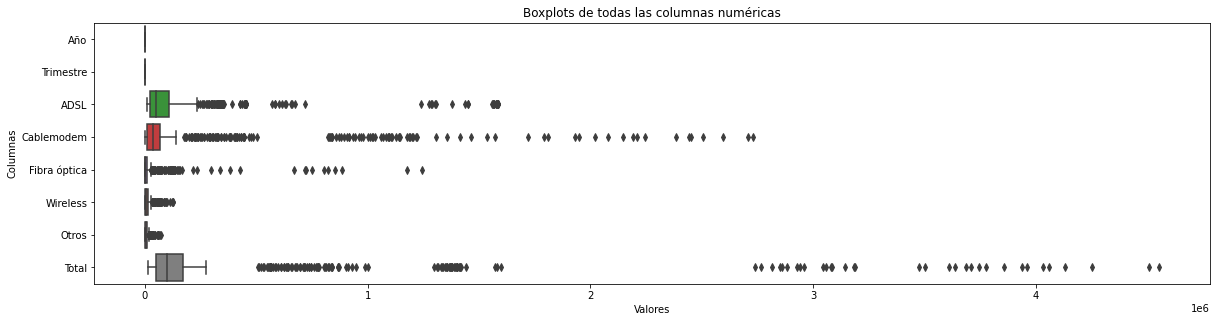

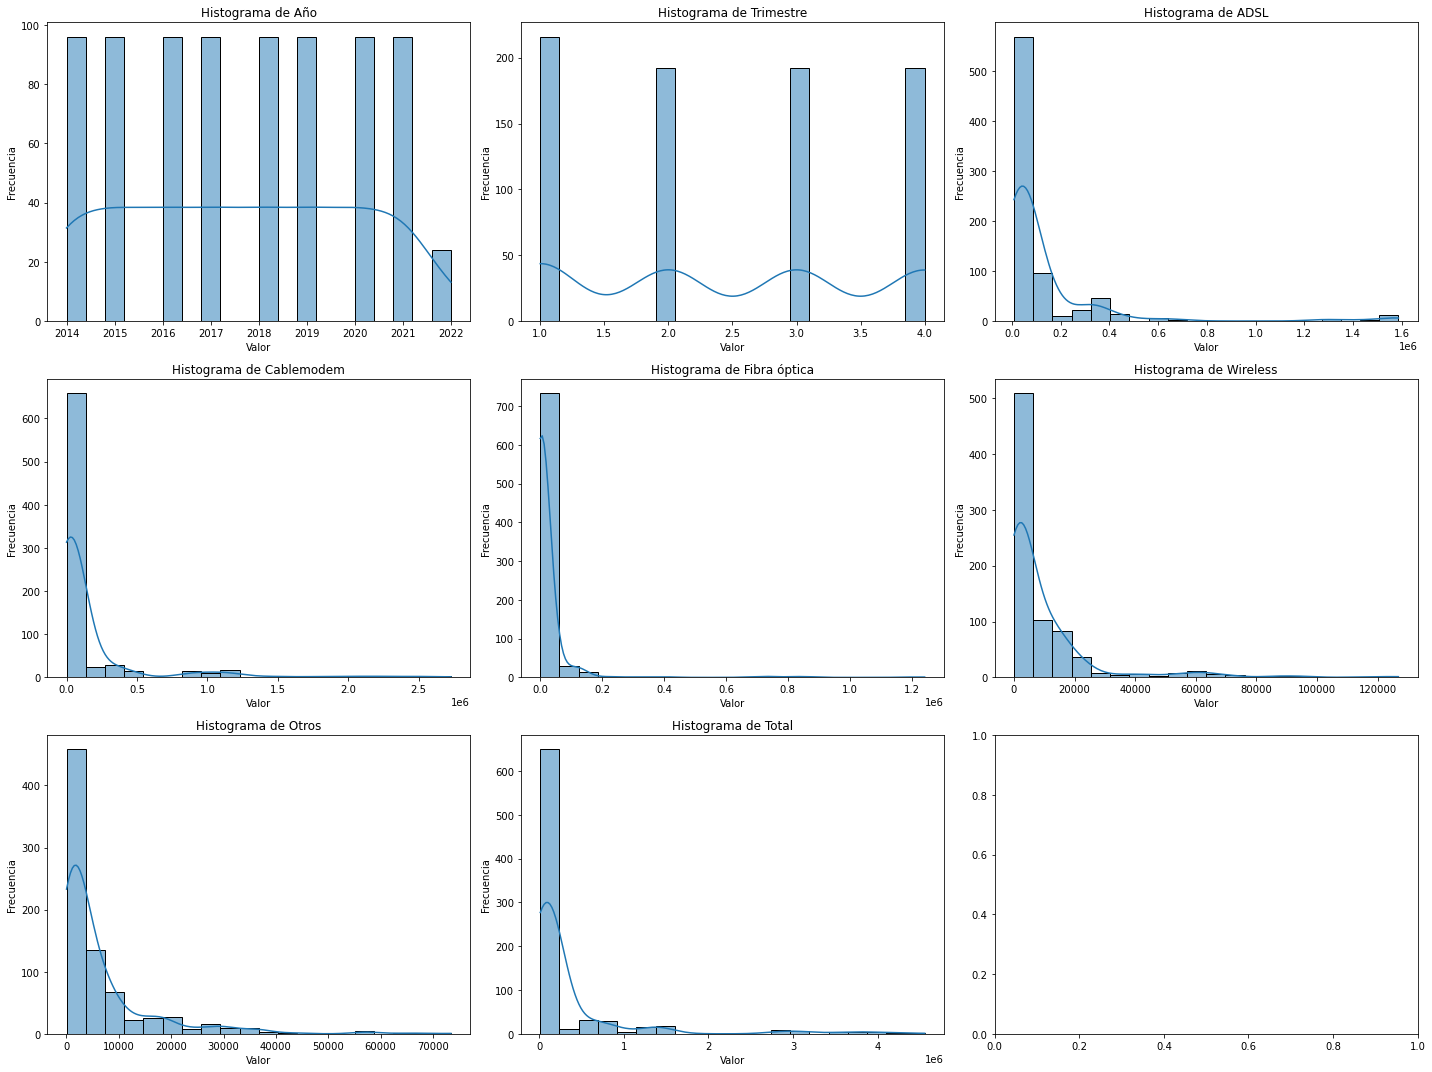

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392045,2728865,1242121,125521,66872,4555424
1,2022,1,Capital Federal,102290,1217225,62308,5784,29934,1417541
2,2022,1,Catamarca,14181,15517,29118,1328,2234,62378
3,2022,1,Chaco,32391,64546,36662,8164,2356,144119
4,2022,1,Chubut,44133,66667,9184,30592,21052,171628
...,...,...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,18927,100,381,4092,3264,26764
788,2014,1,Santa Fe,322662,174296,3059,5951,6440,506612
789,2014,1,Santiago Del Estero,32567,3598,19,915,340,37133
790,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038


In [15]:
data_view(df)

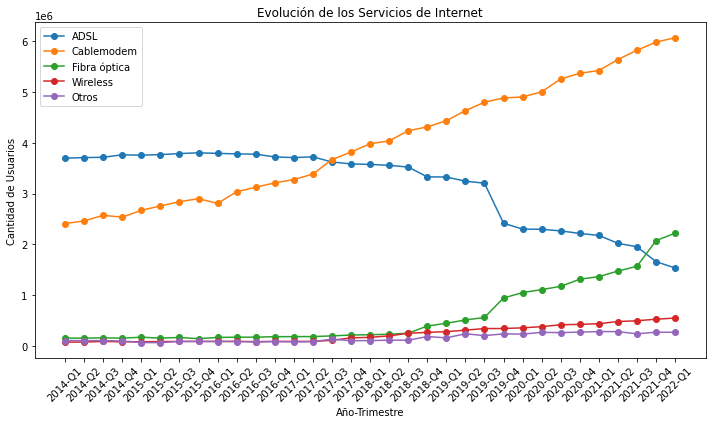

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

servicios = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for servicio in servicios:
    df_servicio = df.groupby(['Año', 'Trimestre'])[servicio].sum().reset_index()
    ax.plot(df_servicio['Año'].astype(str) + '-Q' + df_servicio['Trimestre'].astype(str), df_servicio[servicio], marker='o', label=servicio)

ax.set_xlabel('Año-Trimestre')
ax.set_ylabel('Cantidad de Usuarios')
ax.set_title('Evolución de los Servicios de Internet')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***

In [3]:
df = pd.read_pickle(f'./Internet_datasets/Ingresos_trimestrales_prestación_servicio_Internet_fijo.pickle')

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51432896,Ene-Mar 2022
1,2021,4,45467887,Oct-Dic 2021
2,2021,3,42999944,Jul-Sept 2021
3,2021,2,38239667,Abr-Jun 2021
4,2021,1,36676371,Ene-Mar 2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        33 non-null     int64 
 1   Trimestre                  33 non-null     int64 
 2   Ingresos (miles de pesos)  33 non-null     int32 
 3   Periodo                    33 non-null     object
dtypes: int32(1), int64(2), object(1)
memory usage: 1.0+ KB


None

Año                              2018.0
Trimestre                           2.0
Ingresos (miles de pesos)    13171459.0
dtype: float64


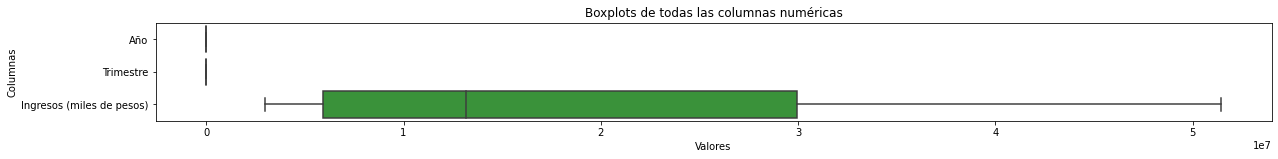

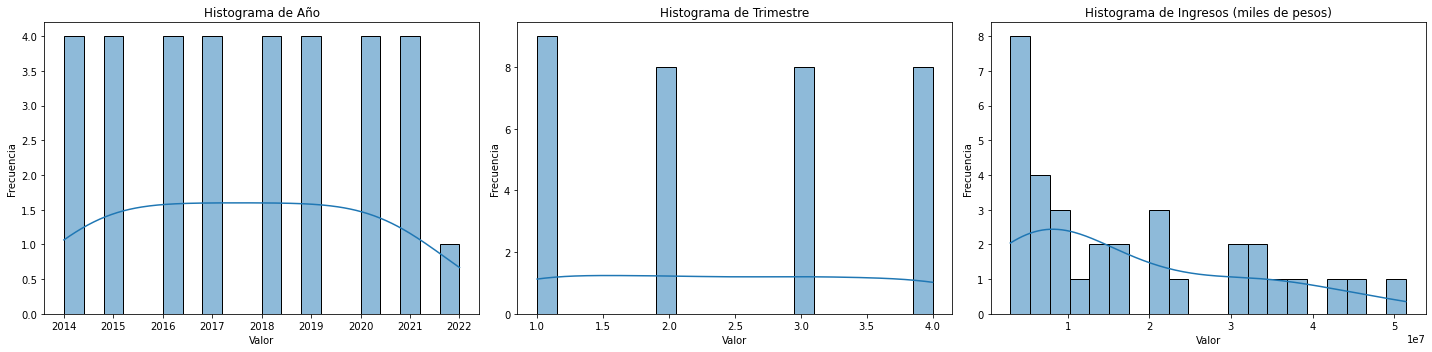

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,1,51432896,Ene-Mar 2022
1,2021,4,45467887,Oct-Dic 2021
2,2021,3,42999944,Jul-Sept 2021
3,2021,2,38239667,Abr-Jun 2021
4,2021,1,36676371,Ene-Mar 2021
5,2020,4,33539703,Oct-Dic 2020
6,2020,3,31997445,Jul-Sept 2020
7,2020,2,32102476,Abr-Jun 2020
8,2020,1,29946216,Ene-Mar 2020
9,2019,4,24169251,Oct-Dic 2019


In [4]:
data_view(df)

In [5]:
df = df.sort_values(['Año','Trimestre'])

C:\Users\guill\AppData\Local\Temp\ipykernel_10780\2553413845.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Periodo', y='Ingresos (miles de pesos)', hue='Año', marker='o', ci=None)


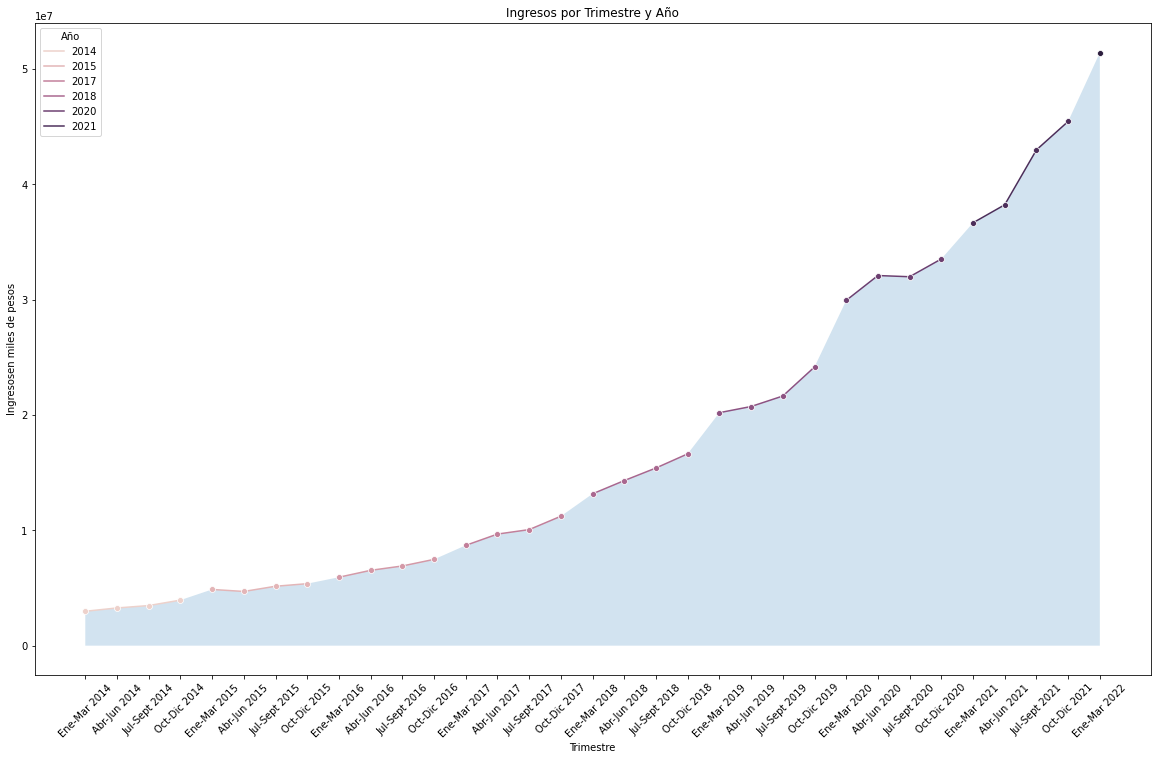

In [6]:
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(20, 12))
sns.lineplot(data=df, x='Periodo', y='Ingresos (miles de pesos)', hue='Año', marker='o', ci=None)
plt.fill_between(df['Periodo'], df['Ingresos (miles de pesos)'], alpha=0.2)
plt.xlabel('Trimestre')
plt.ylabel('Ingresosen miles de pesos')
plt.title('Ingresos por Trimestre y Año')
plt.xticks(rotation=45)
plt.show()

Este grafico demuestras que proveer de acceso a internet es una actividad muy rentable y se podria adjudicar a la globalizacion y a la necesidad de mayores velocidades ya que no solo aumenta la demanda sino que tambien la magnitud de la informacion que se sube y se baja de la internet.

In [10]:
# Crea una columna con la diferencia de ingresos por trimestre y otra con el porcentaje de crecimiento que se tuvo por trimestre
df['Diferencia'] = df['Ingresos (miles de pesos)'].diff()
df['Porcentaje_Crecimiento'] = round(df['Diferencia'] / df['Ingresos (miles de pesos)'].shift() * 100,2)

In [11]:
df

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Diferencia,Porcentaje_Crecimiento
32,2014,1,2984054,Ene-Mar 2014,NaN,NaN
31,2014,2,3270816,Abr-Jun 2014,286762.0,9.61
30,2014,3,3478638,Jul-Sept 2014,207822.0,6.35
29,2014,4,3950441,Oct-Dic 2014,471803.0,13.56
28,2015,1,4876385,Ene-Mar 2015,925944.0,23.44
27,2015,2,4701791,Abr-Jun 2015,-174594.0,-3.58
26,2015,3,5153739,Jul-Sept 2015,451948.0,9.61
25,2015,4,5376899,Oct-Dic 2015,223160.0,4.33
24,2016,1,5936845,Ene-Mar 2016,559946.0,10.41
23,2016,2,6534241,Abr-Jun 2016,597396.0,10.06


Segun los nuevos datos se observa que en el año 2015 entre Abr-Jun se produjo un decrecimiento del 3.58 y luego en el 2020 entre Jul-Sept de 0.33%.

In [13]:
print('Promedio total : ',df['Porcentaje_Crecimiento'].mean())

Promedio total :  9.4728125


Como dato extra el promedio de crecimiento entre el año 2014 y 2022 fue del 9.47 %

***

In [20]:
df = pd.read_pickle(f'./Internet_datasets/Penetración_de_Internet fijo_(accesos_cada_100 hogares).pickle')

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,76.08
1,2022,1,Capital Federal,111.80
2,2022,1,Catamarca,58.21
3,2022,1,Chaco,44.06
4,2022,1,Chubut,88.05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   Accesos por cada 100 hogares  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


None

Año                             2018.000
Trimestre                          2.000
Accesos por cada 100 hogares      44.625
dtype: float64


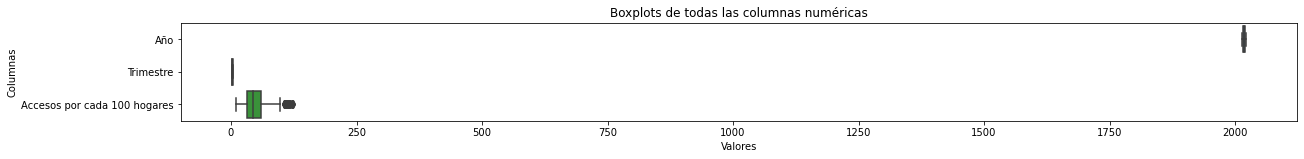

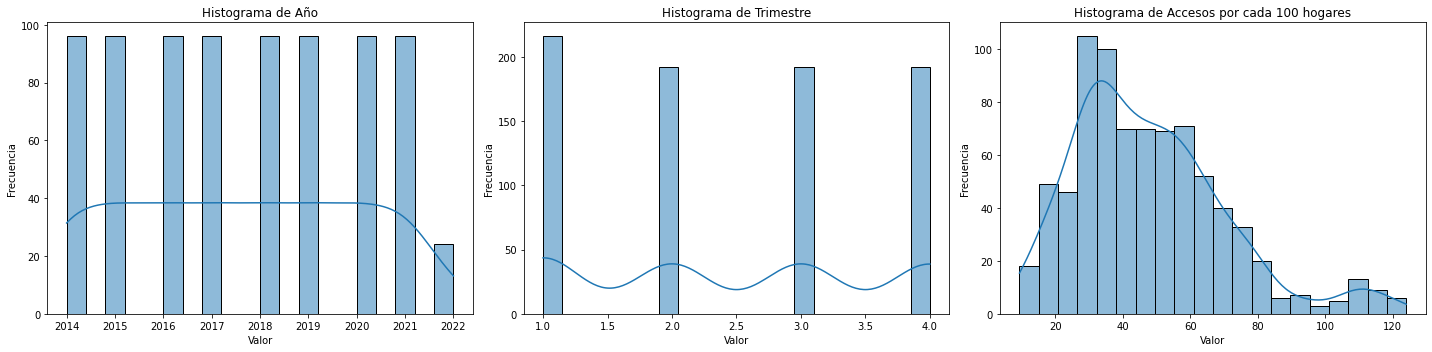

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,76.08
1,2022,1,Capital Federal,111.80
2,2022,1,Catamarca,58.21
3,2022,1,Chaco,44.06
4,2022,1,Chubut,88.05
...,...,...,...,...
787,2014,1,Santa Cruz,28.94
788,2014,1,Santa Fe,47.85
789,2014,1,Santiago Del Estero,16.31
790,2014,1,Tierra Del Fuego,63.97


In [21]:
data_view(df)

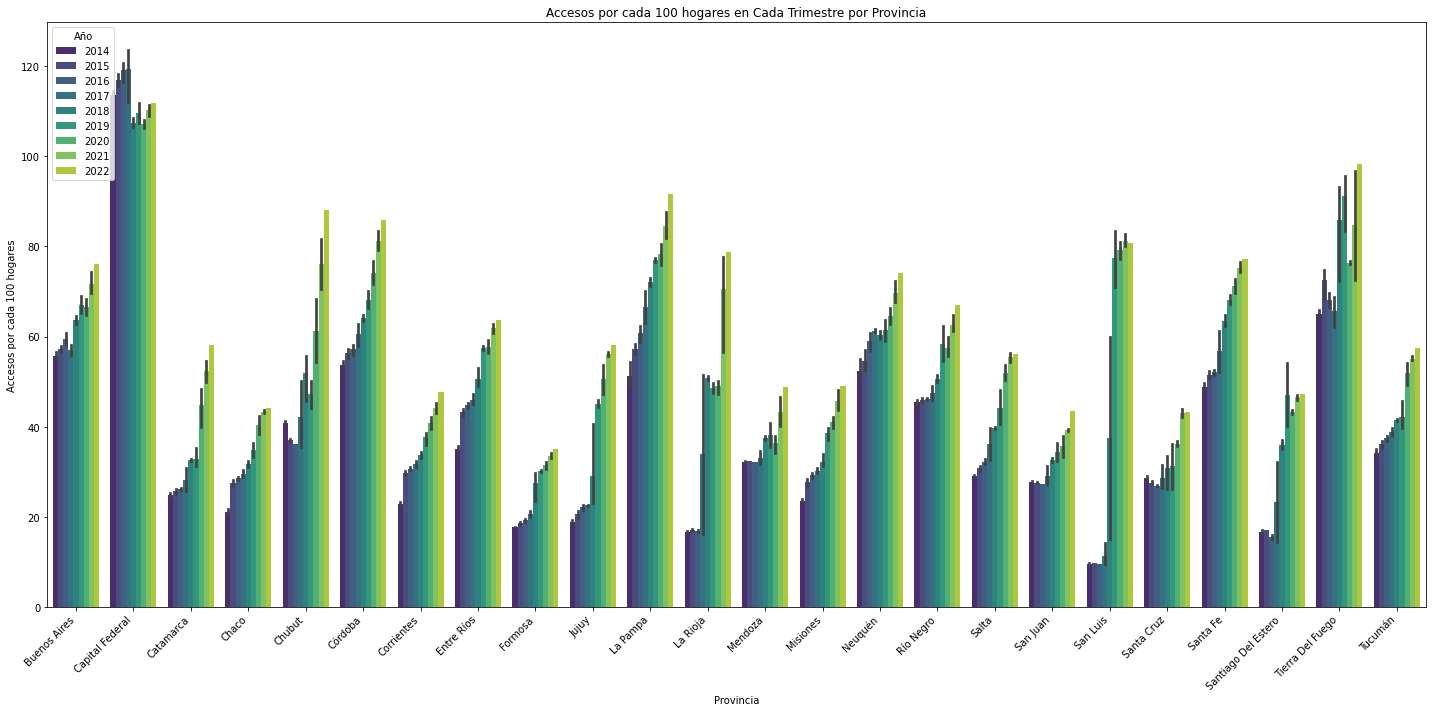

In [22]:
# Crear el gráfico de barras agrupadas con Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Provincia', y='Accesos por cada 100 hogares', hue='Año', palette='viridis')

# Personalizar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares en Cada Trimestre por Provincia')

# Mostrar leyenda
plt.legend(title='Año', loc='upper left')

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()